In [1]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
d = 'C:/kaggle_data/viz/'
os.listdir(d)

['submission.csv', 'test.csv', 'train.csv']

In [3]:
train = pd.read_csv(d+'train.csv')
test = pd.read_csv(d+'test.csv')
ss = pd.read_csv(d+'submission.csv')

In [6]:
train.info(null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3362796 entries, 0 to 3362795
Data columns (total 8 columns):
 #   Column        Non-Null Count    Dtype  
---  ------        --------------    -----  
 0   store_id      3362796 non-null  int64  
 1   date          3362796 non-null  object 
 2   time          3362796 non-null  object 
 3   card_id       3362796 non-null  object 
 4   amount        3362796 non-null  int64  
 5   installments  16860 non-null    float64
 6   days_of_week  3362796 non-null  int64  
 7   holyday       3362796 non-null  int64  
dtypes: float64(1), int64(4), object(3)
memory usage: 205.2+ MB


In [5]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 473392 entries, 0 to 473391
Data columns (total 8 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   store_id      473392 non-null  int64  
 1   date          473392 non-null  object 
 2   time          473392 non-null  object 
 3   card_id       473392 non-null  object 
 4   amount        473392 non-null  int64  
 5   installments  1779 non-null    float64
 6   days_of_week  473392 non-null  int64  
 7   holyday       473392 non-null  int64  
dtypes: float64(1), int64(4), object(3)
memory usage: 28.9+ MB


In [8]:
train.head()

,store_id,date,time,card_id,amount,installments,days_of_week,holyday
0,0,2016-12-14,18:05:31,d297bba73f,5,NaN,2,0
1,0,2016-12-14,18:05:54,d297bba73f,-5,NaN,2,0
2,0,2016-12-19,12:42:31,0880849c05,144,NaN,0,0
3,0,2016-12-19,12:48:08,8b4f9e0e95,66,NaN,0,0
4,0,2016-12-19,13:31:08,7ad237eed0,24,NaN,0,0


In [7]:
train.describe()

,store_id,amount,installments,days_of_week,holyday
count,3.362796e+06,3.362796e+06,16860.000000,3.362796e+06,3.362796e+06
mean,8.323770e+02,1.459623e+02,3.459490,3.066320e+00,4.431283e-02
std,5.468544e+02,6.017306e+02,2.382382,1.976153e+00,2.057892e-01
min,0.000000e+00,-2.500000e+05,2.000000,0.000000e+00,0.000000e+00
25%,3.350000e+02,3.200000e+01,3.000000,1.000000e+00,0.000000e+00
50%,8.220000e+02,7.500000e+01,3.000000,3.000000e+00,0.000000e+00
75%,1.342000e+03,1.500000e+02,3.000000,5.000000e+00,0.000000e+00
max,1.799000e+03,2.500000e+05,36.000000,6.000000e+00,1.000000e+00


In [15]:
train['date'] = train['date'].astype('datetime64')
test['date'] = test['date'].astype('datetime64')

In [17]:
train.set_index('date').resample('1W').sum()

,store_id,amount,installments,days_of_week,holyday
date,,,,,
2016-08-07,17124495,2997806,316.0,60723,0
2016-08-14,17123503,2849505,306.0,62887,0
2016-08-21,17131255,2800295,269.0,61960,2742
2016-08-28,16404740,2817986,309.0,60128,0
2016-09-04,16854631,3071123,356.0,64506,0
...,...,...,...,...,...
2018-07-08,36805116,6263262,687.0,135196,0
2018-07-15,37048889,5775752,708.0,135928,0
2018-07-22,36697691,5764432,674.0,134063,0


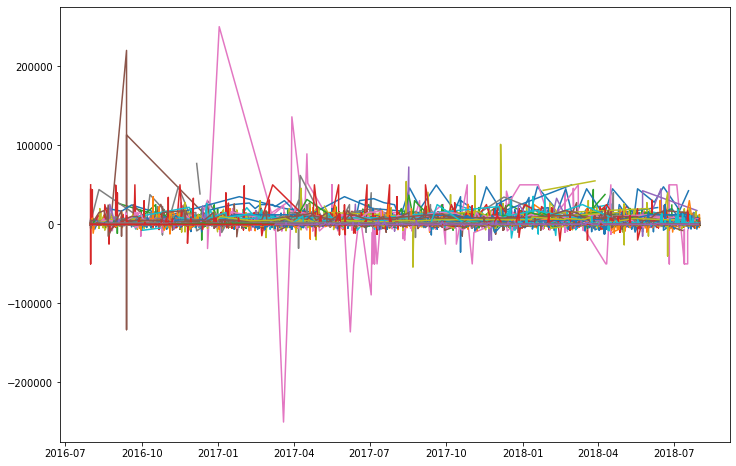

In [29]:
plt.figure(figsize=(12,8))
for i in train['store_id'].unique():
    temp=train[train['store_id']==i]
    plt.plot(temp['date'],temp['amount'])

In [32]:
new = pd.DataFrame(train.groupby(by='store_id')['amount'].sum())

In [36]:
new = new.reset_index()

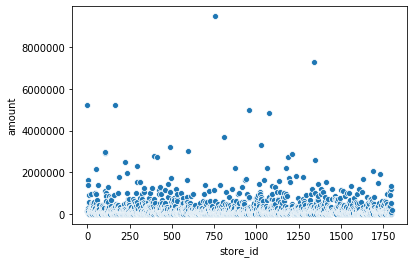

In [37]:
sns.scatterplot(x='store_id',y='amount',data=new)

In [42]:
sorted_new = new.sort_values(by=['amount'],ascending=False)

In [46]:
top10 = sorted_new[:10]

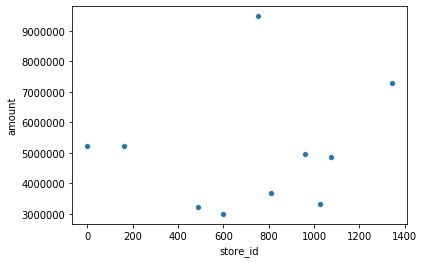

In [47]:
sns.scatterplot(x='store_id',y='amount',data=top10)

## 망한 가게 찾기

In [59]:
st_id=[]
last_day =[]
for i in train['store_id'].unique():
    temp=train[train['store_id']==i]
    st_id.append(i)
    last_day.append(temp['date'].iloc[-1])

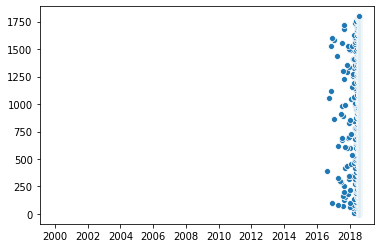

In [60]:
sns.scatterplot(x=last_day,y=st_id)

In [57]:
len(st_id)

1775

In [68]:
new = pd.DataFrame({'id':st_id, 'lday':last_day})

In [103]:
from datetime import timedelta
new['lday'].values.astype('timedelta64') - new['lday'].max()

TypeError: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'

In [104]:
timedelta(new['lday'].max())

TypeError: unsupported type for timedelta days component: Timestamp

In [89]:
timedelta(new.lday.iloc[-1].to_pydatetime)

TypeError: unsupported type for timedelta days component: builtin_function_or_method

In [100]:
x = new.lday.iloc[-1]

In [101]:
from datetime import datetime
datetime.fromtimestamp(x)

TypeError: an integer is required (got type Timestamp)

# timestamp datetime